In [1]:
import numpy as np
from MacroModels.ProductionFunctions import CES
import matplotlib.pyplot as plt

ces = CES(rho=0.3, weights=[0.4, 0.6])

In [2]:
ces(inputs=[1, 0.5])


0.6714064738348786

In [3]:
nx, ny = (20, 20)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

z = ces(inputs=[xv, yv])

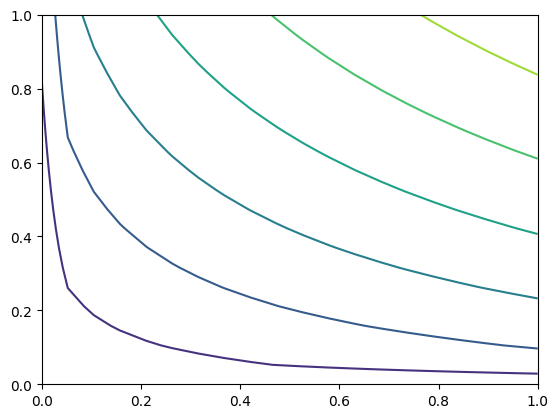

In [4]:
plt.contour(xv, yv, z)

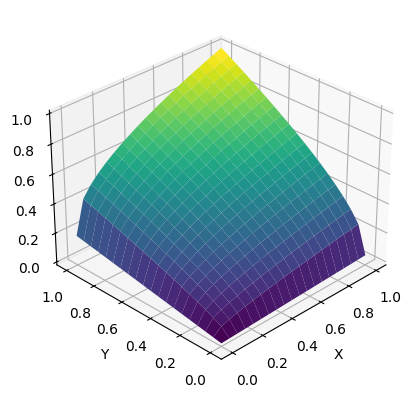

In [5]:
ax=plt.figure().add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=225, elev=30)

# Cost function

In [6]:
output_level= 0.5
input_prices=[1, 0.5]
cost=ces.cost_function(output_level=output_level, input_prices=input_prices)
print(cost)

0.6091514702941643


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an array to store the cost function values
cost_values = np.zeros((ny, nx))

# Compute the cost function at each point on the grid
for i in range(ny):
    for j in range(nx):
        input_prices = [xv[i, j], yv[i, j]]
        cost_values[i, j] = ces.cost_function(output_level=output_level, input_prices=input_prices)

C:\Users\leocr\Projects\Economics\MacroModels\ProductionFunctions.py:272: RuntimeWarning: invalid value encountered in scalar power
  return sum(w * x[i]**params[0] for i, w in enumerate(params[1]))**(1/rho)


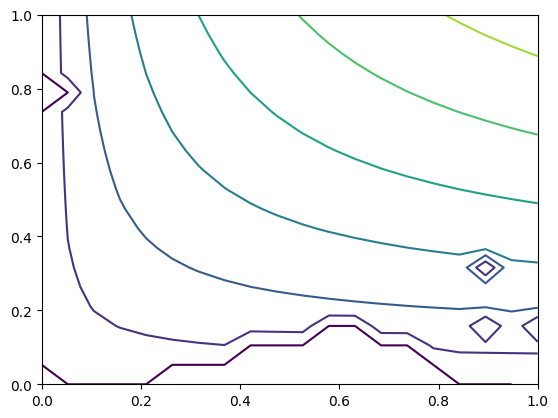

In [8]:
plt.contour(xv, yv, cost_values)

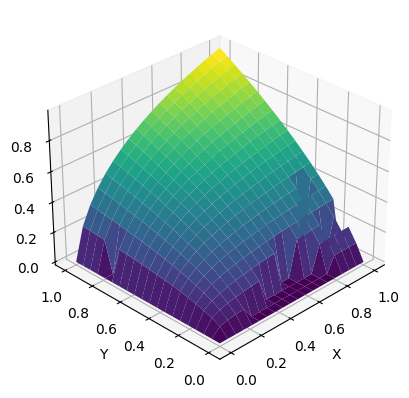

In [9]:
ax=plt.figure().add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, cost_values, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=225, elev=30)

In [10]:
output_level= 0.5
input_prices=[0.3, 0.5]
print(cost)

0.6091514702941643


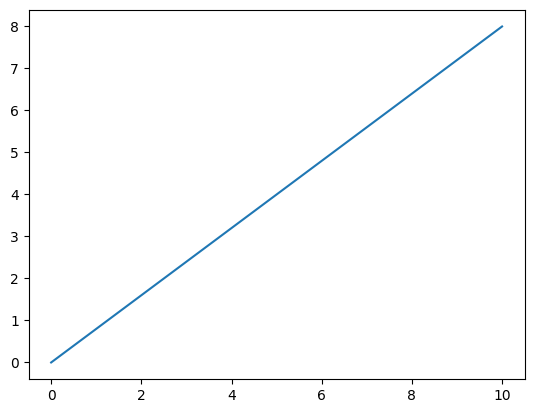

In [15]:
import numpy as np

output_levels = np.linspace(0, 10, 50)

costs_per_level = [ces.cost_function(output_level=output_level, input_prices=input_prices) for output_level in output_levels]

plt.plot(output_levels, costs_per_level)



In [16]:
restricted_costs = [ces.restricted_cost_function(output_level=output_level, input_prices=input_prices, fixed_inputs=[1, 0]) for output_level in output_levels]


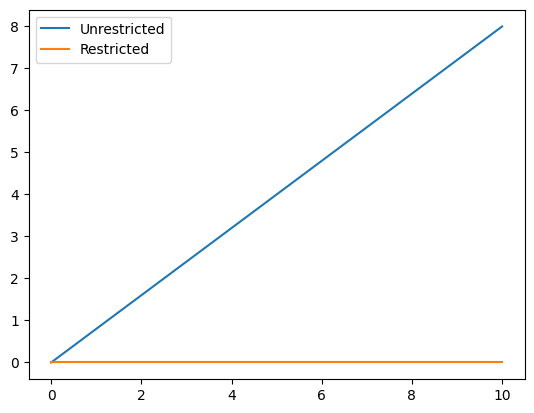

In [17]:
ax=plt.figure().add_subplot(111)
ax.plot(output_levels, costs_per_level, label='Unrestricted')
ax.plot(output_levels, restricted_costs, label='Restricted')
ax.legend()